In [1]:
# Add the project base directory to the path
import os
import sys
project_dir = os.path.abspath('../../')
sys.path.insert(0, project_dir)
# Import GUARD
from guard import world, analysis, parameters, area
import copy

In [2]:
def simulation(n_sim, date_ranges):
    imperial_density = []
    
    for sim in range(n_sim):
        map_ = world.World(params=params, from_file=project_dir+'/data/old_world.yml')
        imperial_density.append(analysis.ImperialDensity(map_, date_ranges))
        for step in range(1500):
            map_.step()
            imperial_density[sim].sample()
            if (map_.step_number)%100 == 0:
                print('simulation: {:2d}\tstep: {:4d}\tyear: {:d}'.format(sim+1, map_.step_number, map_.year()))
    return imperial_density
    

In [3]:
# Average imperial density for all simulations
def average_imperial_density(imperial_density, map_, date_ranges):
    mean_impd = analysis.ImperialDensity(map_, date_ranges=date_ranges)
    for era in mean_impd.date_ranges:
        mean_impd.data[era] = sum([run.data[era] for run in imperial_density])
        mean_impd.data[era] = mean_impd.data[era] / len(imperial_density)
        
    return mean_impd

In [4]:
# Use default parameters
params = parameters.defaults

# Define the date ranges of interest
date_ranges = [analysis.DateRange(-1000,0),
        analysis.DateRange(0,500),
        analysis.DateRange(500,1000),
        analysis.DateRange(1000,1100),
        analysis.DateRange(1100,1200),
        analysis.DateRange(1200,1300),
        analysis.DateRange(1300,1400),
        analysis.DateRange(1400,1500)]

# Load population data
map_ = world.World(params=params, from_file=project_dir+'/data/old_world.yml')
population = analysis.CitiesPopulation(map_, data_file=project_dir+'/data/cities.yml', date_ranges=date_ranges)

# Check if simulation has been run before
if os.path.isfile('./imperial_density.pkl'):
    mean_impd = analysis.ImperialDensity.from_file(map_, './imperial_density.pkl')
else:
    imperial_density = simulation(1, date_ranges)
    mean_impd = average_imperial_density(imperial_density, map_, date_ranges)
    mean_impd.dump('./imperial_density.pkl')

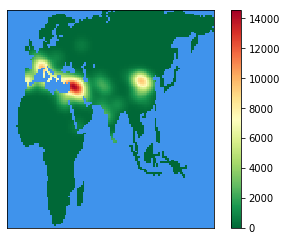

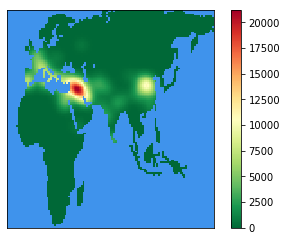

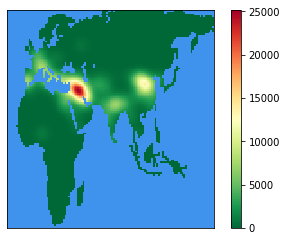

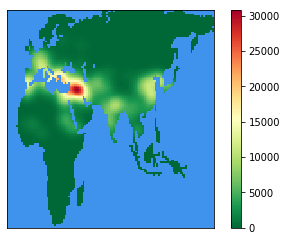

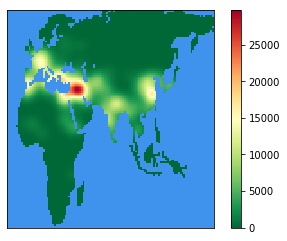

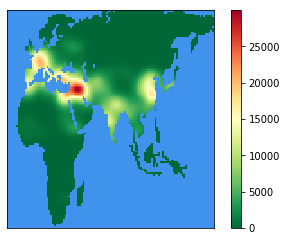

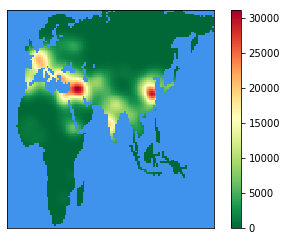

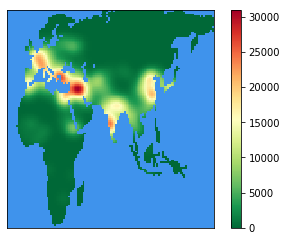

In [ ]:
# Set a blur radius for the population data
blur = 3.0

# Plot population heat maps
population.plot_heatmap(blur=blur)


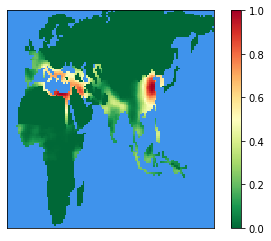

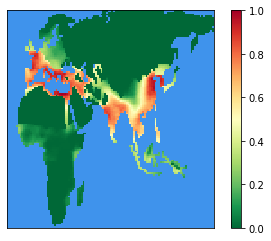

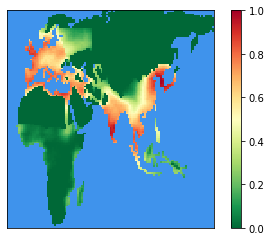

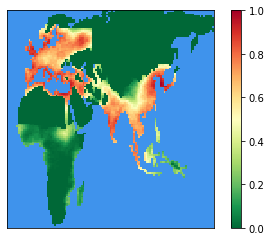

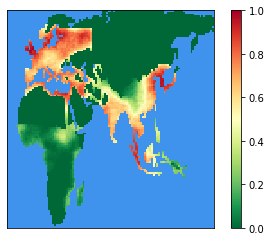

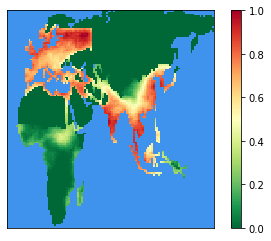

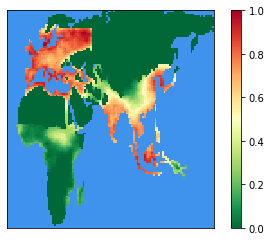

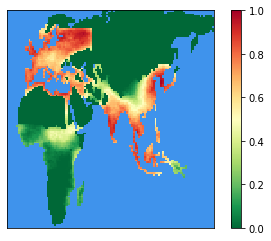

In [ ]:
# Plot imperial density
mean_impd.plot_all()

In [ ]:
# Plot correlation betweem imperial density and population
population.correlate(mean_impd, blur=blur, cumulative=True)